<a href="https://colab.research.google.com/github/JoelJefrin/small-projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NAME: JOEL JEFRIN**
### **USN: 23BTRCL144**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("house_train.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (1168, 81)
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  968          20       RL          NaN     7390   Pave   NaN      IR1   
1  739          90       RL         60.0    10800   Pave   NaN      Reg   
2  696          20       RL         54.0    13811   Pave   NaN      IR1   
3  239          20       RL         93.0    12030   Pave   NaN      Reg   
4  891          50       RL         60.0     8064   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN  MnPrv        Shed    2000   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      7   2008        WD 

In [5]:
# Drop Id column if present
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# Fill missing numeric values with median
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Features & target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/tmp/ipython-input-2379635307.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2379635307.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [6]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # single output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 38611206144.0000 - mae: 180574.2344 - val_loss: 35459661824.0000 - val_mae: 169849.0625
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37777563648.0000 - mae: 178533.1719 - val_loss: 35432046592.0000 - val_mae: 169783.0312
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38812680192.0000 - mae: 181309.7188 - val_loss: 35321536512.0000 - val_mae: 169535.5000
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40389971968.0000 - mae: 183687.2969 - val_loss: 34980675584.0000 - val_mae: 168781.9062
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37652779008.0000 - mae: 177839.6719 - val_loss: 34156914688.0000 - val_mae: 166944.5938
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34915770368.0000 - mae: 172184.6094 - val_loss: 32528644096.0000 - val_mae: 163213.4531
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34751139840.0000 - mae: 170531.8906 - val_loss: 2975507660

In [9]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Mean Absolute Error: {mae:.2f}")

# Predictions
y_pred = model.predict(X_test).flatten()

✅ Test Mean Absolute Error: 26660.30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


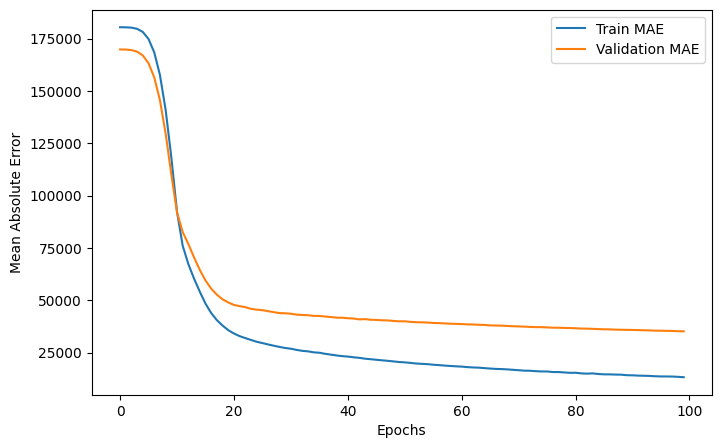

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

In [11]:
comparison = pd.DataFrame({"Actual": y_test.values[:20], "Predicted": y_pred[:20]})
print(comparison)

    Actual      Predicted
0   272000  316707.625000
1   108959  111804.867188
2   137500  137517.343750
3   123500  108685.265625
4   155835  199272.515625
5   155000  153556.187500
6   129000   97907.195312
7   144000     361.297058
8   145000  165086.500000
9   175500  156568.468750
10  264132  266856.718750
11  109500   88831.453125
12  187750  193940.218750
13  223500  168002.140625
14  188500  189089.750000
15  235000  218801.234375
16  149000  118491.843750
17  101000  125927.867188
18  225000  152298.015625
19  176432  171170.593750
